# Домашнее задание № 0
Вам необходимо провести анализ данных и с помощью него ответить на поставленные вопросы.

# Исходные данные
Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачайте датасет и ознакомьтесь с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).

In [ ]:
import pandas as pd
import numpy as np

In [162]:
# Читаем данные
path = 'spotify_data.csv'
df = pd.read_csv(path, index_col=0)

In [164]:
df.sample(4).T

,432988,132895,750474,670838
artist_name,Kelsea Ballerini,Randy Travis,Armin van Buuren,Feodor Chaliapin
track_name,hole in the bottle - ballerini album version,Are the Good Times Really Over,A State Of Trance [ASOT 027] - Intro,"Bless You, Forests"
track_id,1f6BZccfonUYohfGJIeBR1,3rH4Bbh50mXhZkR7weE1fy,1yAuaZ8Rq1eKd8pxxQDAkm,25lXXtpDCagIymh8PtzcRi
popularity,36,13,0,0
year,2020,2014,2001,2000
genre,country,gospel,edm,romance
danceability,0.672,0.509,0.379,0.341
energy,0.552,0.3,0.858,0.0893
key,4,9,11,0
loudness,-6.375,-11.282,-8.183,-17.813


# Вопросы

## Анализ данных
С помощью работы с типом данных DataFrame из библиотеки pandas ответье на поставленные вопросы

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

### 1. Сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете?

**Результат**: Код и текстовый ответ на вопрос в формате

```
Уникальных исполнителей: <ответ>
Уникальных жанров: <ответ>
```

In [166]:
print("Уникальных исполнителей:", df["artist_name"].nunique(), "(если считать Null/NaN значения, которые тоже присутствуют, то:", df["artist_name"].nunique(dropna=False), ")")
print("Уникальных жанров:", df["genre"].nunique())

Уникальных исполнителей: 64158 (если считать Null/NaN значения, которые тоже присутствуют, то: 64159 )
Уникальных жанров: 82


### 2. Есть ли в данных пропуски? Если да, предложите способ их заполнения и реализуйте его

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько пропусков> - <Описание способа заполнения> (Если были пропуски)
```


In [167]:
print("artist_name: missing", df["artist_name"].isna().sum(), "values. Filling with mode value")
print("track_name: missing", df["track_name"].isna().sum(), "values. Filling with mode value")
df["artist_name"].fillna(value=df["artist_name"].mode()[0], inplace=True)
df["track_name"].fillna(value=df["track_name"].mode()[0], inplace=True)
df.info()

artist_name: missing 15 values. Filling with mode value
track_name: missing 1 values. Filling with mode value


<ipython-input-167-894791984e47>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["artist_name"].fillna(value=df["artist_name"].mode()[0], inplace=True)
<ipython-input-167-894791984e47>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

### 3. Есть ли признаки, которые не отвечают указанным в описании ограничениям? Если есть, то замените их

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько не соответствующих ограничениям данных> - <Описание способа замены> (Если были некорректные данные)
```

🚩Простомотрев min, max значения не выявил какого-либо несоответствия с описанием (за исключением отрицательного ключа)

In [168]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


## Визуальный анализ
Ответом на вопрос должен быть график или несколько графиков в одной фигуре (картинке), с минимальной подписью

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Как Energy зависит от Danceability? Как зависит Loudness от Energy? Как эти параметры влияют на Valence?

**Результат**: Код, реализующий графики:

- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability; в одной оси фигуры
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Нарисовать стрелки и подписи к ним на графике, обращающие внимание на ключевые моменты, позволяющие сделать выводы о зависимостях.

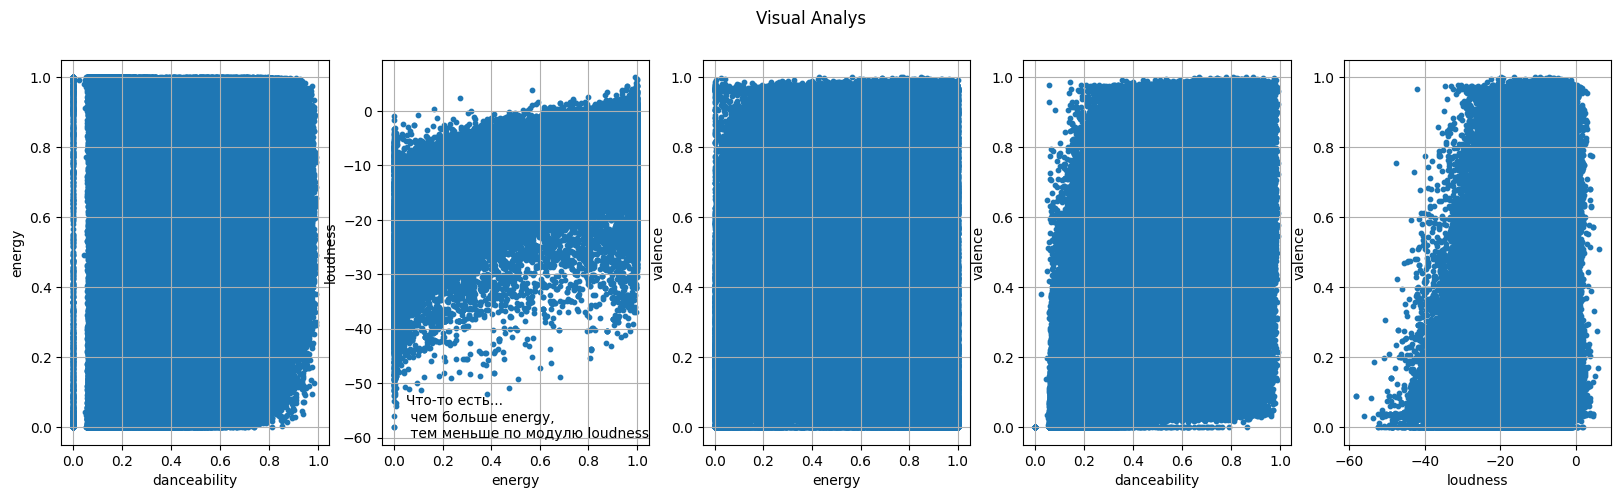

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.suptitle("Visual Analys")


ax[0].scatter(df["danceability"], df["energy"], s = 10)
ax[0].set_ylabel("energy")
ax[0].set_xlabel("danceability")
ax[0].grid()

ax[1].scatter(df["energy"], df["loudness"], s = 10)
ax[1].set_ylabel("loudness")
ax[1].set_xlabel("energy")
ax[1].text(0.05, -60,"Что-то есть...\n чем больше energy,\n тем меньше по модулю loudness")
ax[1].grid()

ax[2].scatter(df["energy"], df["valence"], s = 10)
ax[2].set_ylabel("valence")
ax[2].set_xlabel("energy")
ax[2].grid()

ax[3].scatter(df["danceability"], df["valence"], s = 10)
ax[3].set_ylabel("valence")
ax[3].set_xlabel("danceability")
ax[3].grid()

ax[4].scatter(df["loudness"], df["valence"], s = 10)
ax[4].set_ylabel("valence")
ax[4].set_xlabel("loudness")
ax[4].grid()


<Axes: >

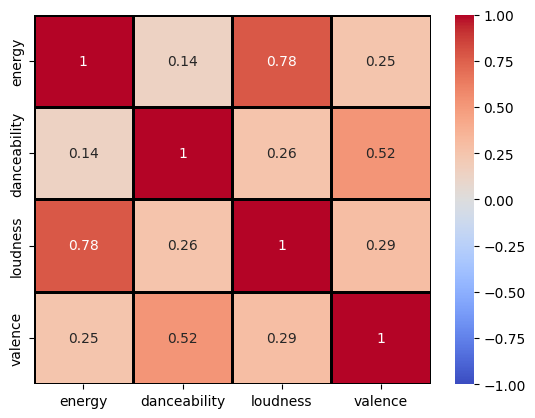

In [171]:
sns.heatmap(df[["energy", "danceability", "loudness", "valence"]].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

#### Сделайте общий вывод о том, зависит ли настроение трека (Valence) от проанализированных параметров:
**Результат**: Текстовый ответ на вопрос.

🚩[ANSWER]: corr=0.52 всё же маловато, чтобы сделать вывод о зависимости Valence от danceability

### 2. С годами музыка становится дольше или быстрее?

**Результат**: Код, реализующий графики:

- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

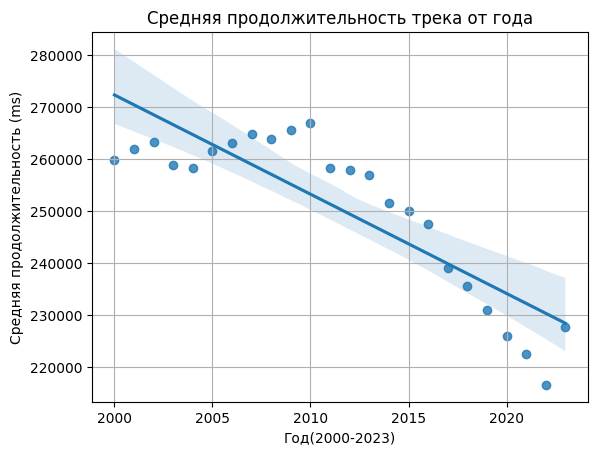

In [172]:
mean_duration = df.groupby('year')['duration_ms'].mean().reset_index()

sns.regplot(x='year', y='duration_ms', data=mean_duration)
plt.title('Средняя продолжительность трека от года')
plt.xlabel('Год(2000-2023)')
plt.ylabel('Средняя продолжительность (ms)')
plt.grid()
plt.show()

<ipython-input-173-8c00c3cff15e>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_long = df.groupby('year').apply(lambda x: x.nlargest(5, 'duration_ms')).reset_index(drop=True)


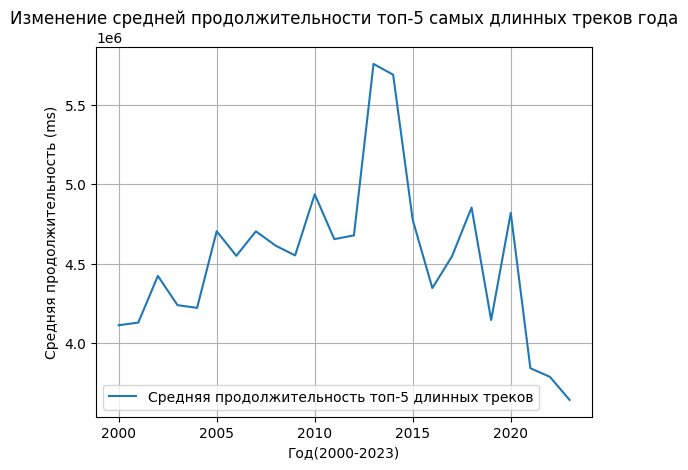

In [173]:
top_5_long = df.groupby('year').apply(lambda x: x.nlargest(5, 'duration_ms')).reset_index(drop=True)
mean_duration_top_5_long = top_5_long.groupby('year')['duration_ms'].mean().reset_index()

sns.lineplot(x='year', y='duration_ms', data=mean_duration_top_5_long, label='Средняя продолжительность топ-5 длинных треков')
plt.title('Изменение средней продолжительности топ-5 самых длинных треков года')
plt.xlabel('Год(2000-2023)')
plt.ylabel('Средняя продолжительность (ms)')
plt.legend()
plt.grid()
plt.show()

<ipython-input-174-89d813d6fab2>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_short = df.groupby('year').apply(lambda x: x.nsmallest(5, 'duration_ms')).reset_index(drop=True)


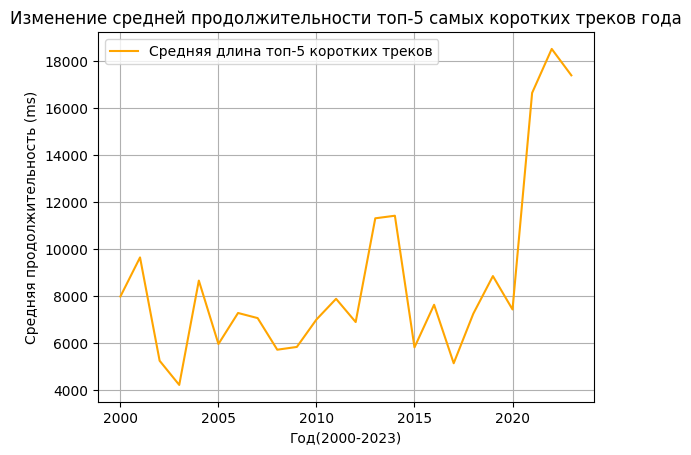

In [174]:
top_5_short = df.groupby('year').apply(lambda x: x.nsmallest(5, 'duration_ms')).reset_index(drop=True)
mean_duration_top_5_short = top_5_short.groupby('year')['duration_ms'].mean().reset_index()

sns.lineplot(x='year', y='duration_ms', data=mean_duration_top_5_short, label='Средняя длина топ-5 коротких треков', color='orange')
plt.title('Изменение средней продолжительности топ-5 самых коротких треков года')
plt.xlabel('Год(2000-2023)')
plt.ylabel('Средняя продолжительность (ms)')
plt.legend()
plt.grid()
plt.show()

### 3. Как менялись популярные жанры от 2000 от 2023?

**Результат**: Код, реализующий график:
- 3 самых популярных по среднему значению жанра каждого года, с подписью значений

График должен иметь название, подписанные оси и подпись значений

**Дополнительно**: Текстовый ответ, какие жанры оказывались в топ-3 чаще всего.

🚩[ANSWER] Чаще всего оказывались pop, rock, hip-hop, dance

In [177]:
grouped = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()
# Находим три самых популярных жанра для каждого года
top_genres = grouped.loc[grouped.groupby('year')['popularity'].nlargest(3).reset_index()['level_1']]

# Переименуем столбцы для удобства
top_genres = top_genres.rename(columns={'popularity': 'average_popularity'})

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

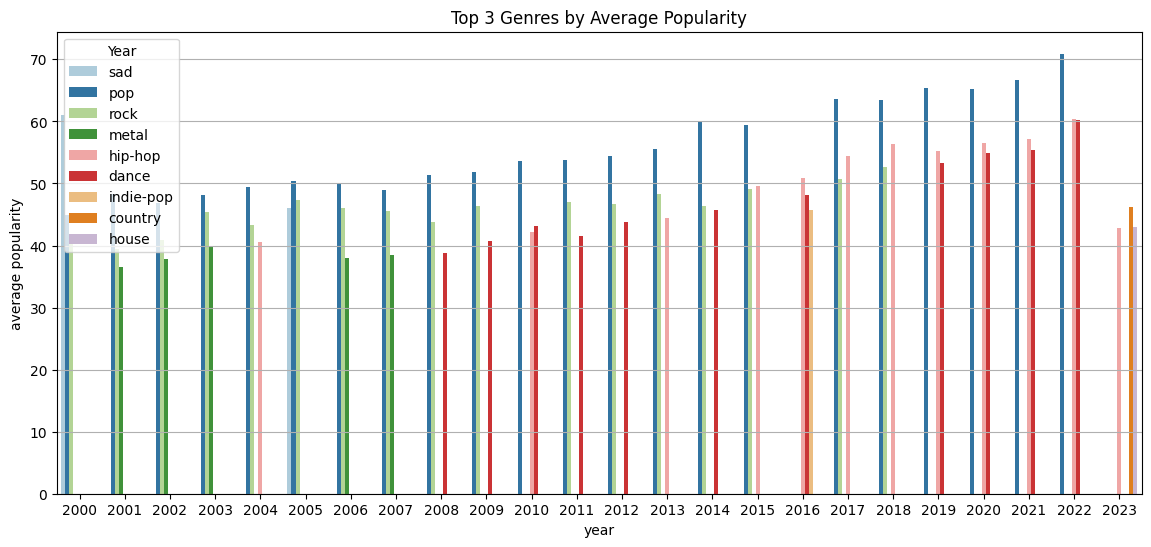

In [178]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top_genres, x='year', y='average_popularity', hue='genre', palette='Paired')
plt.title('Top 3 Genres by Average Popularity')
plt.xlabel('year')
plt.ylabel('average popularity')
plt.grid(axis='y')
plt.legend(title='Year')
plt.show()

### 4. Как связаны между собой Speechiness, Acousticness и Instrumentalness?

**Результат**: Код, реализующий 2 различных по типу графика. Выбранные графики должны наиболее хорошо подходить для описания зависимости между указанными параметрами.

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Текстовый ответ, почему были выбраны именно такие графики.

🚩[ANSWER]Затрудняюсь дать конкретный ответ, на инстинктах выбрал.. :)
Зависимостей как таковых исходя из corr матрицы нет, но видно, что распределения у признаков примерно одинаковые.

Text(0.5, 1.0, 'pairplot')

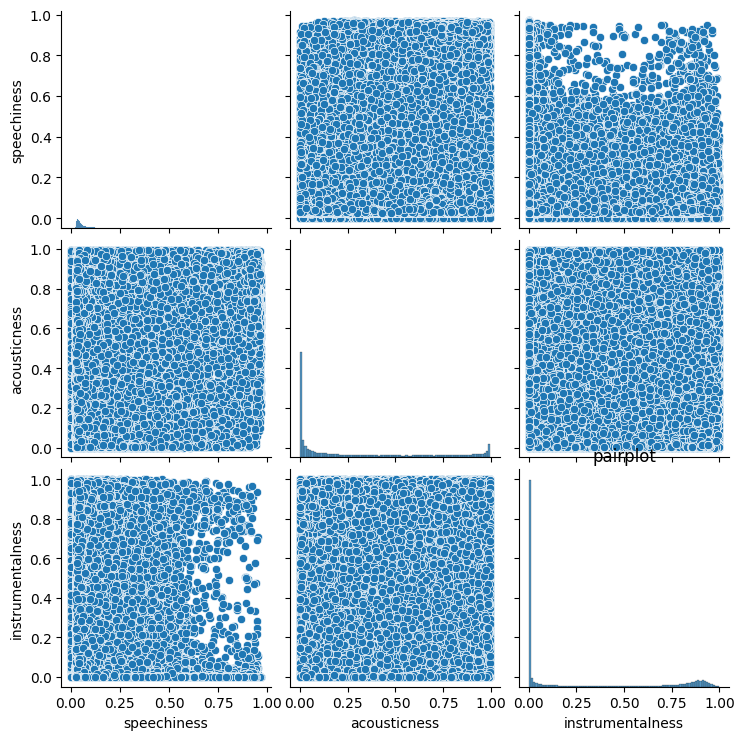

In [179]:
sns.pairplot(df[["speechiness", "acousticness", "instrumentalness"]])
plt.title("pairplot")

<Axes: >

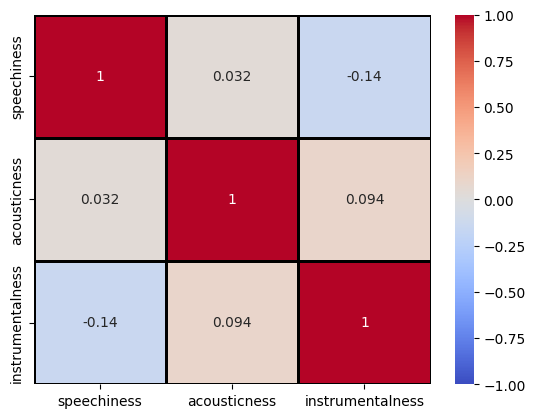

In [180]:
sns.heatmap(df[["speechiness", "acousticness", "instrumentalness"]].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

Text(0.5, 1.0, 'hists')

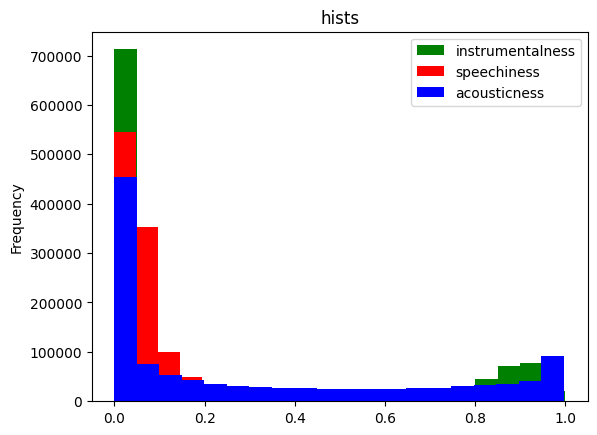

In [181]:
df['instrumentalness'].plot(kind='hist',alpha=1,bins=20,density=False, color='g')
df['speechiness'].plot(kind='hist',alpha=1,bins=20,density=False, color='r')
df['acousticness'].plot(kind='hist',alpha=1,bins=20,density=False, color='b')
plt.legend(loc='upper right')
plt.title("hists")

### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?

**Результат**: Код, реализующий фигуру:

- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

Фигура должна иметь название и легенду, каждый график имеет подписанные оси и название.

In [182]:
### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?
deep_house = df[["time_signature", "mode", "popularity", "genre"]][(df["genre"]=="deep-house")]
dh_group = deep_house.groupby(["time_signature","mode"])['popularity'].mean().reset_index()

funk = df[["time_signature", "mode", "popularity"]][(df["genre"]=="funk")]
funk_group = deep_house.groupby(["time_signature","mode"])['popularity'].mean().reset_index()

forro = df[["time_signature", "mode", "popularity"]][(df["genre"]=="forro")]
forro_group = deep_house.groupby(["time_signature","mode"])['popularity'].mean().reset_index()

dancehall = df[["time_signature", "mode", "popularity"]][(df["genre"]=="dancehall")]
dancehall_group = deep_house.groupby(["time_signature","mode"])['popularity'].mean().reset_index()

house = df[["time_signature", "mode", "popularity"]][(df["genre"]=="house")]
house_group = deep_house.groupby(["time_signature","mode"])['popularity'].mean().reset_index()


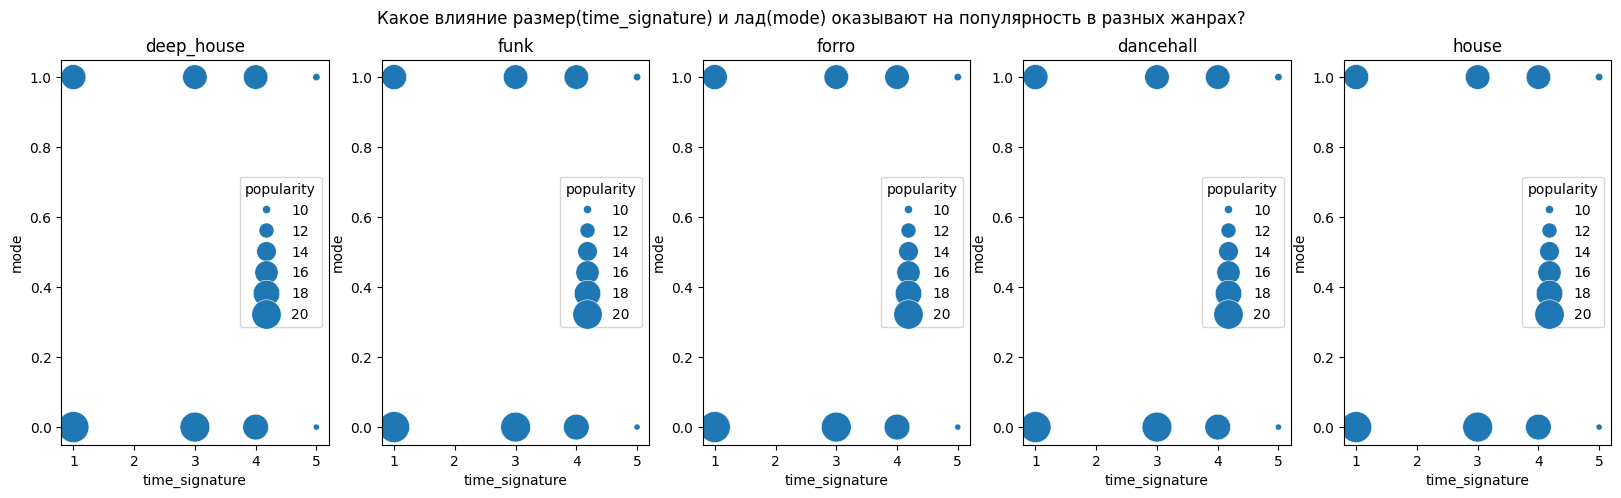

In [183]:
#для автоматизации отрисовки
mass = [dh_group, funk_group, forro_group, dancehall_group, house_group]
mass_of_names = list(["deep_house", "funk", "forro", "dancehall", "house"])
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.suptitle("Какое влияние размер(time_signature) и лад(mode) оказывают на популярность в разных жанрах?")

for i in range(len(mass)):
    sns.scatterplot(x = mass[i]['time_signature'],y = mass[i]['mode'],size = mass[i]['popularity'],sizes=(20, 500),legend='brief',ax=ax[i])
    ax[i].set_title(mass_of_names[i])
    ax[i].set_ylabel("mode")
    ax[i].set_xlabel("time_signature")



🚩[ANSWER] mode особо не влияет, а вот time_signature делает разницу)

### 6. Как выглядят нормальные распределения, построенные для темпа по уникальным значениям размера трека?
**Результат**: Код, реализующий графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature).

Фигура должна иметь название и легенду. Распределения должны быть построены либо на одном графике, либо на нескольких графиках, но в рамках одной фигуры.

**Дополнительно**: Код с ответом на вопрос, какие параметры (среднее и разброс) для нормальных распределений темпа для размера трека.

In [184]:
print(df["time_signature"].value_counts())
print("Параметры (среднее и разброс) для нормальных распределений темпа для размера трека (time_signature):")
print("{time_sig=0} mean =", df["tempo"][(df["time_signature"]==0)].mean(), "std =", df["tempo"][(df["time_signature"]==0)].std())
print("{time_sig=1} mean =", df["tempo"][(df["time_signature"]==1)].mean(), "std =", df["tempo"][(df["time_signature"]==1)].std())
print("{time_sig=3} mean =", df["tempo"][(df["time_signature"]==3)].mean(), "std =", df["tempo"][(df["time_signature"]==3)].std())
print("{time_sig=4} mean =", df["tempo"][(df["time_signature"]==4)].mean(), "std =", df["tempo"][(df["time_signature"]==4)].std())
print("{time_sig=5} mean =", df["tempo"][(df["time_signature"]==5)].mean(), "std =", df["tempo"][(df["time_signature"]==5)].std())

time_signature
4    1010673
3     112332
5      22871
1      12660
0       1228
Name: count, dtype: int64
Параметры (среднее и разброс) для нормальных распределений темпа для размера трека (time_signature):
{time_sig=0} mean = 2.7892084690553745 std = 18.34664915552816
{time_sig=1} mean = 110.16770955766192 std = 29.473976912084083
{time_sig=3} mean = 119.91302164120643 std = 34.926732452895244
{time_sig=4} mean = 121.99507205792578 std = 28.778103719672558
{time_sig=5} mean = 113.83371194963055 std = 31.205632919442994


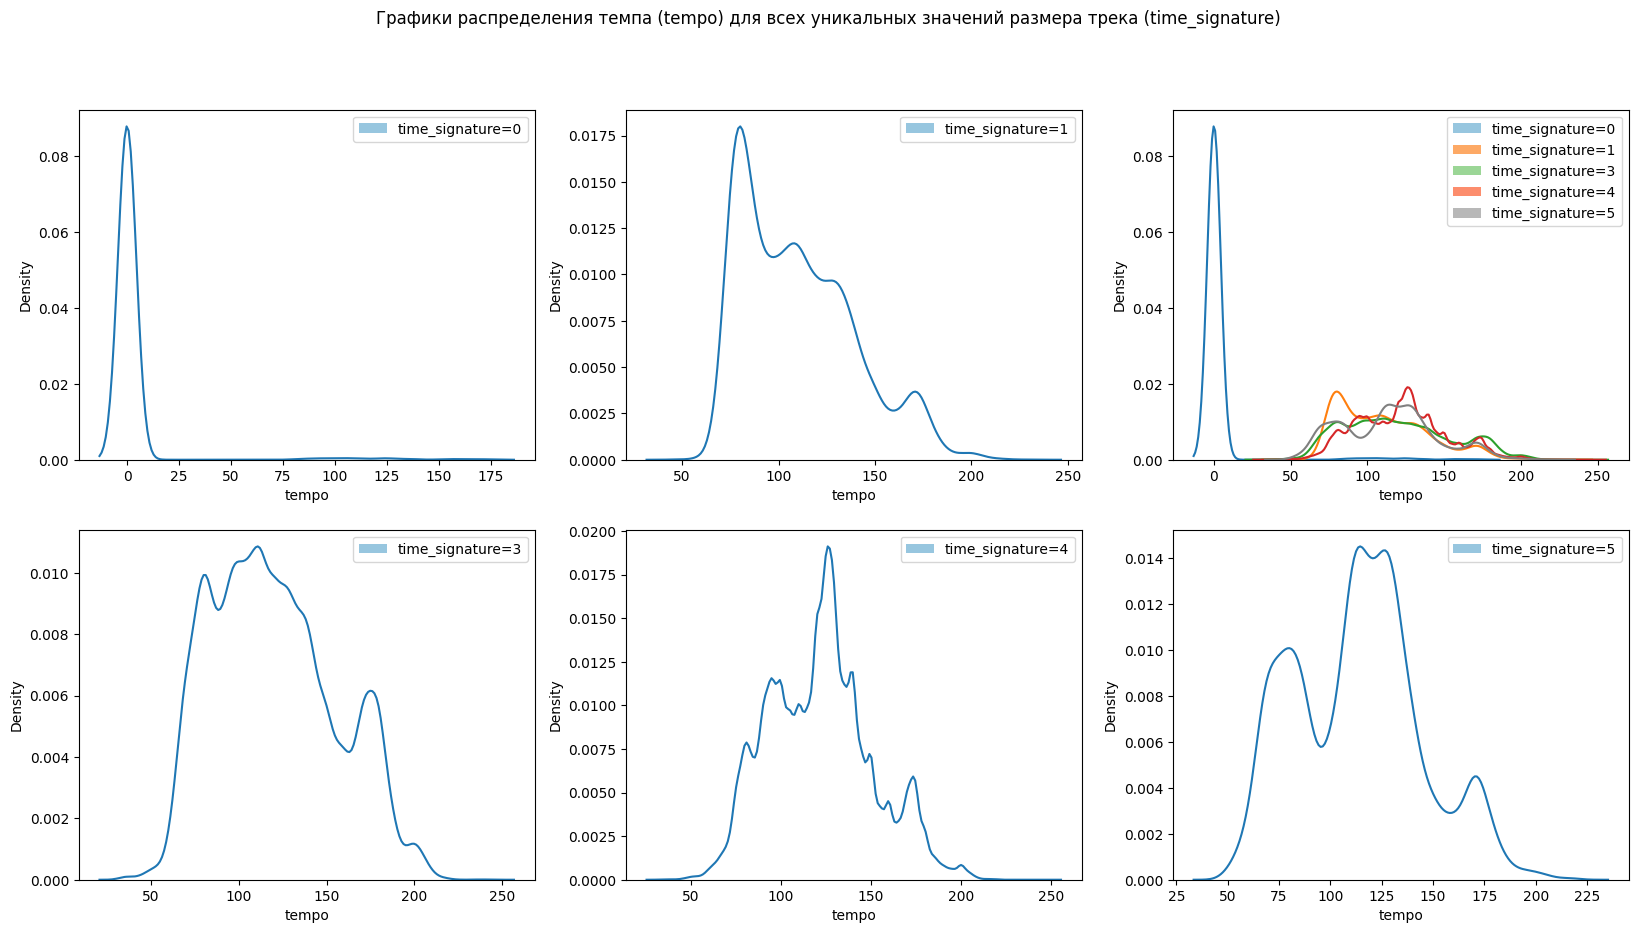

In [185]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature)")
import matplotlib.patches as  mpatches


sns.kdeplot(x=df["tempo"][(df["time_signature"]==0)], ax=ax[0][0])
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=0")]
ax[0][0].legend(handles=handles)

sns.kdeplot(x=df["tempo"][(df["time_signature"]==1)], ax=ax[0][1])
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=1")]
ax[0][1].legend(handles=handles)

sns.kdeplot(x=df["tempo"][(df["time_signature"]==3)], ax=ax[1][0])
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=3")]
ax[1][0].legend(handles=handles)

sns.kdeplot(x=df["tempo"][(df["time_signature"]==4)], ax=ax[1][1])
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=4")]
ax[1][1].legend(handles=handles)

sns.kdeplot(x=df["tempo"][(df["time_signature"]==5)], ax=ax[1][2])
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=5")]
ax[1][2].legend(handles=handles)


sns.kdeplot(x=df["tempo"][(df["time_signature"]==0)], ax=ax[0][2])
sns.kdeplot(x=df["tempo"][(df["time_signature"]==1)], ax=ax[0][2])
sns.kdeplot(x=df["tempo"][(df["time_signature"]==3)], ax=ax[0][2])
sns.kdeplot(x=df["tempo"][(df["time_signature"]==4)], ax=ax[0][2])
sns.kdeplot(x=df["tempo"][(df["time_signature"]==5)], ax=ax[0][2], color='grey')
handles = [mpatches.Patch(facecolor=plt.cm.Blues(100), label="time_signature=0"),
           mpatches.Patch(facecolor=plt.cm.Oranges(100), label="time_signature=1"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="time_signature=3"),
           mpatches.Patch(facecolor=plt.cm.Reds(100), label="time_signature=4"),
           mpatches.Patch(facecolor=plt.cm.Greys(100), label="time_signature=5")]
ax[0][2].legend(handles=handles)


### 7. Проанализируйте популярность одного артиста (группы) с 10-100 треками на Ваш выбор.

**Результат**: Код, реализующий следующие графики:

- График, отражающий динамику суммарной популярности артиста год от года. Укажите стрелками с подписями, благодаря каким треками артист был на пике и на дне популярности.
- Сопоставьте признаки для этих двух треков, в виде графиков на Ваш выбор. Укажите, какие из признаков вероятнее всего оказали наибольшее влияние на популярность выбранных треков.

Графики должны находится в одной фигуре, имеющей название. Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

In [186]:
my_artist_df = df[df.columns][(df["artist_name"]=="Anal Cunt")]
print(my_artist_df.shape)
my_artist_df = my_artist_df[~my_artist_df.apply(lambda row: row.astype(str).str.contains('\$').any(), axis=1)]
print("shape after deleting raw with'$'", my_artist_df.shape)
#сортируем по году
my_artist_df.sort_values(by="year", inplace=True)

(67, 19)
shape after deleting raw with'$' (66, 19)


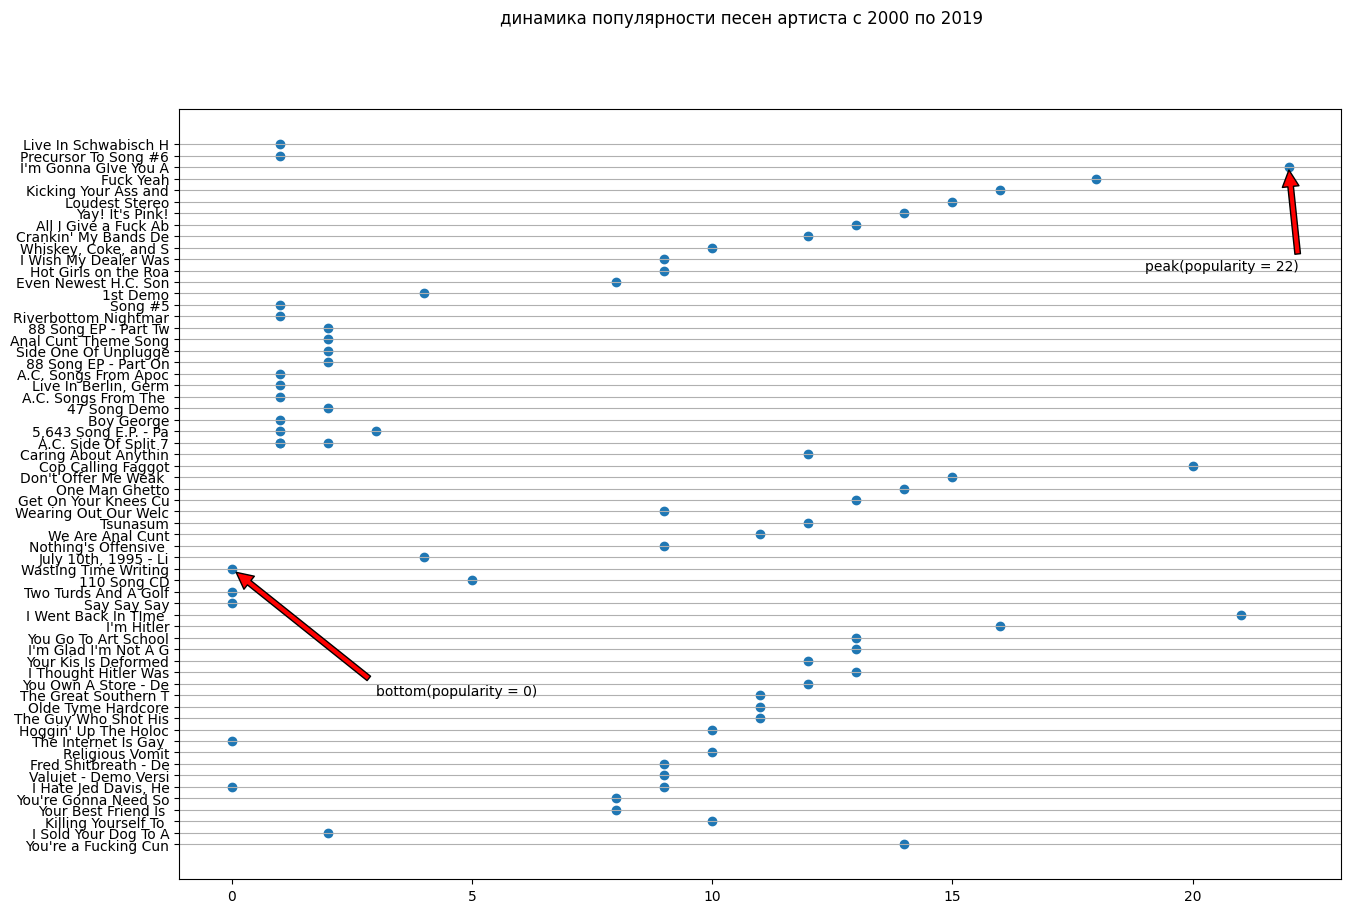

In [187]:
y = np.array(my_artist_df["track_name"])
for i in range(len(y)):
    y[i] = str(y[i])[:20]

fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("динамика популярности песен артиста с 2000 по 2019")
ax.scatter(my_artist_df["popularity"], y)
ax.annotate("peak(popularity = 22)", xy=(22, 59), xytext=(19, 50),
            arrowprops=dict(facecolor='red', shrink=0.03))

ax.annotate("bottom(popularity = 0)", xy=(0, 24), xytext=(3, 13),
            arrowprops=dict(facecolor='red', shrink=0.03))

plt.grid(axis='y')

Text(0.5, 0, 'year')

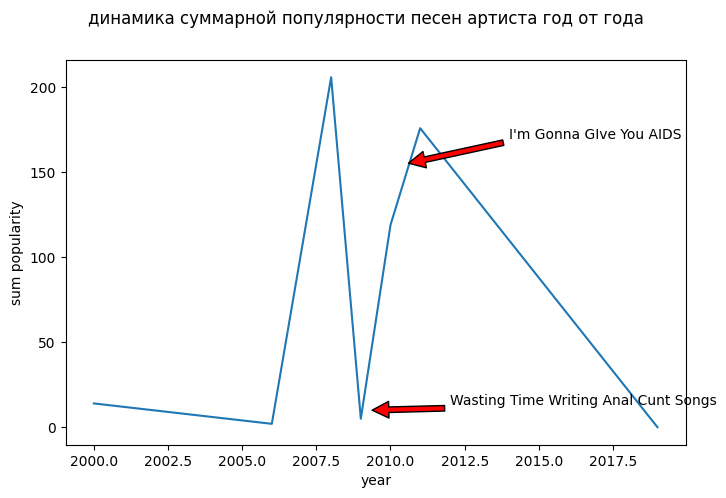

In [188]:
by_year = my_artist_df.groupby("year")['popularity'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("динамика суммарной популярности песен артиста год от года")
ax.plot(by_year["year"], by_year["popularity"])
ax.annotate(text = my_artist_df.iloc[62]["track_name"], xy=(2010.5, 155), xytext=(2014, 170),
            arrowprops=dict(facecolor='red', shrink=0.03))

ax.annotate(text = my_artist_df.iloc[24]["track_name"], xy=(2009.3, 10), xytext=(2012, 13),
            arrowprops=dict(facecolor='red', shrink=0.03))
ax.set_ylabel("sum popularity")
ax.set_xlabel("year")

In [189]:
srav = pd.DataFrame([my_artist_df.iloc[62], my_artist_df.iloc[24]])
srav

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1431972,Anal Cunt,I'm Gonna GIve You AIDS,0xPEmCsJJ9xPTmXkh7Ujwm,22,2011,grindcore,0.286,0.998,9,-4.857,0,0.1200,0.0112,0.00822,0.359,0.0272,110.091,193427,4
1362150,Anal Cunt,Wasting Time Writing Anal Cunt Songs,5p9frxlIdrY0SOlam9f3ZO,0,2010,grindcore,0.315,0.926,9,-7.041,0,0.0335,0.6060,0.15800,0.446,0.0000,82.006,18107,4


❗ Построив heatmap, предполагаем, что на popularity хорошо влияет energy, но не в нашем случае т.к. у обоих треков значение energy примерно одиноковое..

<Axes: >

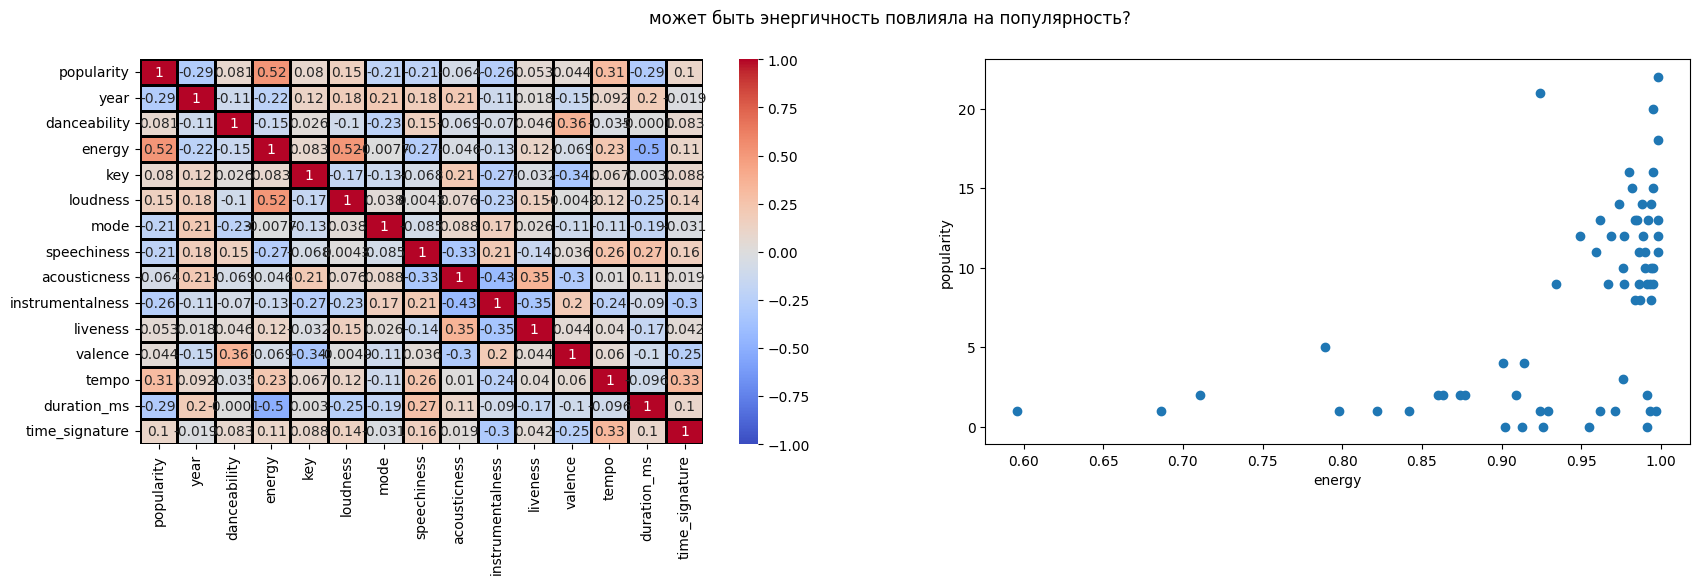

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle("может быть энергичность повлияла на популярность?")
ax[1].scatter(my_artist_df["energy"], my_artist_df["popularity"])
ax[1].set_ylabel("popularity")
ax[1].set_xlabel("energy")
sns.heatmap(my_artist_df.drop(["artist_name", "track_name", "track_id", "genre"], axis=1).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', ax=ax[0])